[View in Colaboratory](https://colab.research.google.com/github/pamsfwang/perceptual_learning/blob/master/tensorflow_stimuli_cortical_learning.ipynb)

##Simple neural network model for testing learning of stimuli
The script is modified from tensorflow tutorial
https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough

Input: stimuli parameters
- 3 features  (4 levels for each feature)
- 2 categories




In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import pandas as pd


import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.9.0-rc2
Eager execution: True


In [6]:
#Mount Google drive on Colab
#step01
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#step02: code for mounting google drive on Linux
!mkdir -p drive
!google-drive-ocamlfuse drive

#step03
os.getcwd()
!ls
os.chdir('./drive/Colab_files')
os.getcwd()
!ls

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8

Setting up lsb-release (9.20160110ubuntu5) ...
Setting up libgirepository-1.0-1:amd64 (1.54.1-1) ...
Setting up libkmod2:amd64 (24-1ubuntu2) ...
Setting up gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not de

In [0]:
#function for organizing csv data
def parse_csv(line):
  example_defaults = [[0.], [0.], [0.], [0]]  # sets field types
  parsed_line = tf.decode_csv(line, example_defaults)
  # First 3 fields are features, combine into single tensor
  features = tf.reshape(parsed_line[:-1], shape=(3,))
  # Last field is the label
  label = tf.reshape(parsed_line[-1], shape=())
  return features, label

In [0]:
#specify file names
##train
fname_train = 'stimuli_param_uniqueF3_train.csv' #'jfj_stimuli_param_train.csv'
skip = 0 #skip header:0 -> no header
batch_size= 52
shuffle_buffer_size = 100
epoch = 200

##test
fname_test = 'stimuli_param_uniqueF3_test.csv' #'jfj_stimuli_param_test.csv'
skip_test = 0 # skip header: 0 -> no header
batch_size_test= 10 
shuffle_buffer_size_test = 100


In [26]:
#Load data: stimuli feature design
train_dataset = tf.data.TextLineDataset(fname_train)
train_dataset = train_dataset.skip(skip)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=shuffle_buffer_size)  # randomize
train_dataset = train_dataset.batch(batch_size)

# View a single example entry from a batch
features, label = iter(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])
print(features)
print(label)

example features: tf.Tensor([ 2.  3. 39.], shape=(3,), dtype=float32)
example label: tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[[ 2.  3. 39.]
 [ 1.  4. 25.]
 [ 2.  4. 23.]
 [ 2.  1. 37.]
 [ 3.  1. 45.]
 [ 1.  1. 43.]
 [ 3.  4. 21.]
 [ 1.  2. 37.]
 [ 3.  4. 11.]
 [ 3.  4. 25.]
 [ 2.  2. 47.]
 [ 3.  3. 43.]
 [ 1.  3. 33.]
 [ 2.  4. 13.]
 [ 3.  1. 31.]
 [ 4.  3. 15.]
 [ 2.  3. 17.]
 [ 1.  2.  5.]
 [ 2.  1. 27.]
 [ 3.  3. 45.]
 [ 2.  2. 33.]
 [ 1.  1. 31.]
 [ 3.  1.  5.]
 [ 1.  4.  1.]
 [ 2.  4. 29.]
 [ 4.  3. 47.]
 [ 3.  3. 13.]
 [ 1.  3. 39.]
 [ 2.  1.  3.]
 [ 4.  1. 17.]
 [ 3.  2. 49.]
 [ 4.  1.  9.]
 [ 4.  3. 21.]
 [ 2.  2. 35.]
 [ 4.  4. 11.]
 [ 3.  4. 27.]
 [ 3.  3.  9.]
 [ 3.  4.  1.]
 [ 2.  2. 41.]
 [ 2.  1.  7.]], shape=(40, 3), dtype=float32)
tf.Tensor(
[0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 1 1], shape=(40,), dtype=int32)


In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(3,)),  # input shape: number of features
  #tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(2)#output layer: 2 node (2 categories)
])

In [0]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, model.variables)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [29]:
## Note: Rerunning this cell uses the same model variables
# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = epoch

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop 
  for x, y in train_dataset:
    # Optimize the model
    grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables),
                              global_step=tf.train.get_or_create_global_step())

    # Track progress
    epoch_loss_avg(loss(model, x, y))  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 10 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.561, Accuracy: 48.077%
Epoch 010: Loss: 1.281, Accuracy: 57.692%
Epoch 020: Loss: 0.847, Accuracy: 51.923%
Epoch 030: Loss: 0.780, Accuracy: 57.692%
Epoch 040: Loss: 0.662, Accuracy: 59.615%
Epoch 050: Loss: 0.713, Accuracy: 57.692%
Epoch 060: Loss: 0.685, Accuracy: 59.615%
Epoch 070: Loss: 0.650, Accuracy: 63.462%
Epoch 080: Loss: 0.667, Accuracy: 59.615%
Epoch 090: Loss: 0.653, Accuracy: 59.615%
Epoch 100: Loss: 0.574, Accuracy: 67.308%
Epoch 110: Loss: 0.682, Accuracy: 59.615%
Epoch 120: Loss: 0.654, Accuracy: 57.692%
Epoch 130: Loss: 0.647, Accuracy: 59.615%
Epoch 140: Loss: 0.671, Accuracy: 59.615%
Epoch 150: Loss: 0.641, Accuracy: 61.538%
Epoch 160: Loss: 0.699, Accuracy: 59.615%
Epoch 170: Loss: 0.687, Accuracy: 61.538%
Epoch 180: Loss: 0.677, Accuracy: 61.538%
Epoch 190: Loss: 0.663, Accuracy: 59.615%


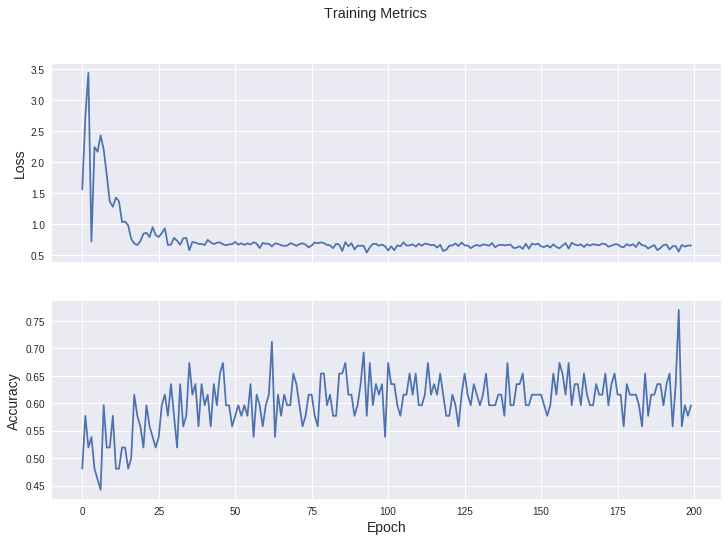

In [30]:
#Plot
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

In [37]:
model.fit

<bound method Model.fit of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5d93204a20>>

In [33]:
#test model
test_dataset = tf.data.TextLineDataset(fname_test)
test_dataset = test_dataset.skip(skip_test)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(shuffle_buffer_size_test)       # randomize
test_dataset = test_dataset.batch(batch_size_test)           # use the same batch size as the training set

# View a single example entry from a batch
features, label = iter(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])
print(features)
print(label)


example features: tf.Tensor([ 3.  4. 25.], shape=(3,), dtype=float32)
example label: tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[[ 3.  4. 25.]
 [ 3.  2. 49.]
 [ 1.  1. 31.]
 [ 3.  3. 13.]
 [ 3.  2. 51.]
 [ 1.  3. 39.]
 [ 3.  1. 31.]
 [ 1.  1. 43.]
 [ 3.  4. 21.]
 [ 3.  4.  1.]
 [ 4.  3. 15.]
 [ 3.  3. 49.]
 [ 2.  1. 27.]
 [ 4.  4. 11.]
 [ 3.  4. 11.]
 [ 2.  4. 29.]
 [ 3.  3. 43.]
 [ 2.  1.  3.]
 [ 1.  4.  1.]
 [ 4.  2. 23.]
 [ 4.  4. 51.]
 [ 2.  4. 23.]
 [ 1.  1.  3.]
 [ 2.  3.  7.]
 [ 2.  1. 37.]
 [ 4.  1. 17.]
 [ 1.  2. 37.]
 [ 4.  4. 19.]
 [ 2.  2. 41.]
 [ 1.  3. 33.]
 [ 3.  2. 41.]
 [ 3.  3. 45.]
 [ 3.  4. 27.]
 [ 1.  2.  5.]
 [ 2.  2. 35.]
 [ 1.  2. 19.]
 [ 1.  4. 25.]
 [ 3.  1.  5.]
 [ 3.  3.  9.]
 [ 4.  2. 29.]], shape=(40, 3), dtype=float32)
tf.Tensor(
[1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0], shape=(40,), dtype=int32)


In [32]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 81.250%
